# Gravitational Waves in General Relativity V An Exact Spherical Wave by Marder
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

Metric Taken From Gravitational Waves in General Relativity V. An Exact Spherical Wave.  The paper starts with metric 1, does a series of transformations and winds up with metric 4 which we use here.

https://www.jstor.org/stable/2413901

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
T,R,phi,zeta,dT,dR,dphi,dzeta = symbols( 'T R phi zeta dT dR dphi dzeta' ) 

In [4]:
variables = Matrix( [T,R,phi,zeta] )
variables

⎡T⎤
⎢ ⎥
⎢R⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣ζ⎦

In [5]:
differentials = Matrix( [dT,dR,dphi,dzeta])
differentials

⎡ dT  ⎤
⎢     ⎥
⎢ dR  ⎥
⎢     ⎥
⎢dphi ⎥
⎢     ⎥
⎣dzeta⎦

In [6]:
psi = Function('psi')(R,T)
psi

In [7]:
gamma = Function('gamma')(R,T)
gamma

In [11]:
lineElement = expand(( - dR**2 + dT**2 ) * exp(2*(gamma-psi)) - dzeta**2 * exp(2*psi) - dphi**2 * exp(-2*psi) * R**2 )
lineElement 

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅γ(R, T)  -2⋅ψ(R, T)                                                       ⎤
⎢ℯ         ⋅ℯ                       0                    0              0     ⎥
⎢                                                                             ⎥
⎢                          2⋅γ(R, T)  -2⋅ψ(R, T)                              ⎥
⎢          0             -ℯ         ⋅ℯ                   0              0     ⎥
⎢                                                                             ⎥
⎢                                                   2  -2⋅ψ(R, T)             ⎥
⎢          0                        0             -R ⋅ℯ                 0     ⎥
⎢                                                                             ⎥
⎢                                                                    2⋅ψ(R, T)⎥
⎣          0                        0                    0         -ℯ         ⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡ 2⋅γ(R, T)  -2⋅ψ(R, T)                                                       ⎤
⎢ℯ         ⋅ℯ                       0                    0              0     ⎥
⎢                                                                             ⎥
⎢                          2⋅γ(R, T)  -2⋅ψ(R, T)                              ⎥
⎢          0             -ℯ         ⋅ℯ                   0              0     ⎥
⎢                                                                             ⎥
⎢                                                   2  -2⋅ψ(R, T)             ⎥
⎢          0                        0             -R ⋅ℯ                 0     ⎥
⎢                                                                             ⎥
⎢                                                                    2⋅ψ(R, T)⎥
⎣          0                        0                    0         -ℯ         ⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("T R phi zeta")
t,r,phi,zeta = syms

In [17]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(R, T)) - ──(ψ(R, T))  ──(γ(R, T)) - ──(ψ(R, T))               0                      
⎢⎢∂T            ∂T           ∂R            ∂R                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(R, T)) - ──(ψ(R, T))  ──(γ(R, T)) - ──(ψ(R, T))               0                      
⎢⎢∂R            ∂R           ∂T            ∂T                                               
⎢⎢                                                                                          
⎢⎢                                                        2  -2⋅γ(R, T) ∂                   
⎢⎢            0                          0              -R ⋅ℯ          ⋅──(ψ(R, T))         
⎢⎢                                                                    

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞           
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂       
⎢R⋅⎜───(γ(R, T)) - ───(γ(R, T)) - ───(ψ(R, T)) - 2⋅⎜──(ψ(R, T))⎟  + ───(ψ(R, T))⎟ + ──(γ(R, 
⎢  ⎜  2              2              2              ⎝∂T         ⎠      2         ⎟   ∂R      
⎢  ⎝∂R             ∂T             ∂R                                ∂T          ⎠           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                     R                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                               ∂     

In [22]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                        ∂                                               ∂  
⎢               2                2   1.0⋅──(γ(R, T))                                     ──(
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂R                    ∂           ∂             ∂T 
⎢- ⎜──(ψ(R, T))⎟  - ⎜──(ψ(R, T))⎟  + ───────────────       - 2⋅──(ψ(R, T))⋅──(ψ(R, T)) + ───
⎢  ⎝∂R         ⎠    ⎝∂T         ⎠           R                  ∂R          ∂T               
⎢                                                                                           
⎢                                   ∂                                                       
⎢                                   ──(γ(R, T))                      2                2   1.
⎢         ∂           ∂             ∂T                  ⎛∂          ⎞    ⎛∂          ⎞      
⎢     - 2⋅──(ψ(R, T))⋅──(ψ(R, T)) + ───────────       - ⎜──(ψ(R, T))⎟  - ⎜──(ψ(R, T))⎟  + ──
⎢         ∂R          ∂T                 R              ⎝∂R         ⎠ 

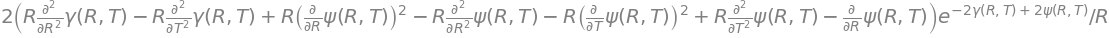

In [23]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [25]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
simplify(rm1.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [27]:
weyl = WeylTensor.from_metric(metric)
simplify(weyl.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     